In [1]:
import os, treetaggerwrapper, networkx as nx, collections
import pandas as pd
import numpy as np
from HanTa import HanoverTagger as ht
import nltk, string
from nltk.stem.snowball import GermanStemmer
from nltk.stem import PorterStemmer
from nltk import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, neighbors
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from pprint import pprint
nltk.download('wordnet')
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from scipy import sparse
import matplotlib.pyplot as plt

H:\anaconda\lib\site-packages\treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dorian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('G:/Extractive-Summarisation-of-German-Wikipedia/dataset/data_class.csv', encoding='utf-8')

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [4]:
df

,source1,no_words_inSent_SS,no_words_inSent_SK,noCap_LetterWords_inSentence,sim_sent
0,Minghella Sohn italienisch-schottischer Eltern...,1,0,7,1
1,Nach Schulabschluss studierte Universität Hul...,0,0,6,0
2,1978 drehte ersten Kurzfilm .,0,0,1,0
3,Seit 1981 Autor Story Editor tätig .,0,0,4,0
4,"Er wurde Theaterstücken , Rundfunkhörspielen...",0,0,9,0
...,...,...,...,...,...
3513930,Carl Sigmans Text erschien 1960er Jahren briti...,0,0,7,1
3513931,Camillo Felgen alias Heinz Helmer verfasste de...,5,1,12,0
3513932,Zahlreiche Interpreten sangen 1964 Lied franzo...,1,1,11,1
3513933,Von Letzterer stammt spanischsprachige Fassung...,2,1,6,0


<AxesSubplot:title={'center':'Number of keywords in sentences'}>

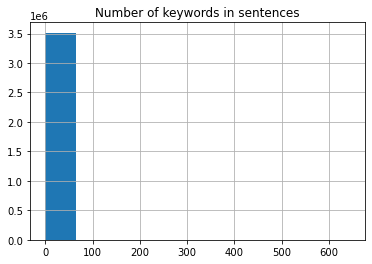

In [5]:
import matplotlib.pyplot as plt
plt.title("Number of keywords in sentences")
df['noCap_LetterWords_inSentence'].hist()

<AxesSubplot:title={'center':'Number of words from the summary in sentences'}>

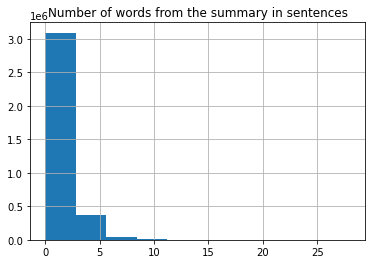

In [6]:
import matplotlib.pyplot as plt
plt.title("Number of words from the summary in sentences")
df['no_words_inSent_SS'].hist()

In [7]:
df['sim_sent'] = np.where((df.noCap_LetterWords_inSentence>8.0) | (df.no_words_inSent_SS>=2.0), 'Yes', 'No')

<BarContainer object of 2 artists>

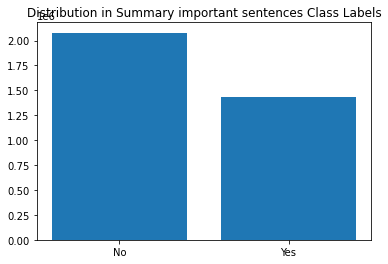

In [8]:
from collections import Counter
plt.title("Distribution in Summary important sentences Class Labels")
plt.bar(dict(Counter(df['sim_sent'])).keys(), dict(Counter(df['sim_sent'])).values())

In [9]:
nltk.download('wordnet') # first-time use only
german_stop_words = stopwords.words('german')
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dorian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
stopword_list = nltk.corpus.stopwords.words('german')

tv = TfidfVectorizer(min_df = 0.05, max_df = 0.8, tokenizer=LemNormalize, stop_words = stopword_list)
X = tv.fit_transform(df['source1'])
vocab = tv.get_feature_names()

H:\anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'au', 'bi', 'de', 'diesis', 'dy', 'e', 'mus', 'un', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [11]:
X1 = pd.DataFrame(X.toarray(), columns = vocab)
X1['no_words_inSent_SS	'] = df['no_words_inSent_SS']
X1['no_words_inSent_SK'] = df['no_words_inSent_SK']
X1['noCap_LetterWords_inSentence'] = df['noCap_LetterWords_inSentence']

In [12]:
X1

,für,wurde,no_words_inSent_SS\t,no_words_inSent_SK,noCap_LetterWords_inSentence
0,1.000000,0.000000,1,0,7
1,0.000000,0.000000,0,0,6
2,0.000000,0.000000,0,0,1
3,0.000000,0.000000,0,0,4
4,0.748524,0.663108,0,0,9
...,...,...,...,...,...
3513930,0.000000,0.000000,0,0,7
3513931,0.000000,1.000000,5,1,12
3513932,0.000000,0.000000,1,1,11
3513933,0.000000,0.000000,2,1,6


In [13]:
X_sparse = sparse.csr_matrix(X1.values)
X = X_sparse.toarray()
y = df.sim_sent.values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred_nb = gnb_classifier.predict(X_test)
print("\n============ Naive Bayes")
print("---- confusion_matrix:")
print(confusion_matrix(y_test,y_pred_nb))
print("---- classification_report:")
print(classification_report(y_test,y_pred_nb))
print("---- accuracy_score:")
print(accuracy_score(y_test,y_pred_nb))


============ Naive Bayes
---- confusion_matrix:
[[572894  50618]
 [ 40447 390222]]
---- classification_report:
              precision    recall  f1-score   support

          No       0.93      0.92      0.93    623512
         Yes       0.89      0.91      0.90    430669

    accuracy                           0.91   1054181
   macro avg       0.91      0.91      0.91   1054181
weighted avg       0.91      0.91      0.91   1054181

---- accuracy_score:
0.9136154038063672


In [15]:
from rouge import Rouge

hy, rf = y_pred_nb, y_test
rouge= Rouge()
scoresT1= rouge.get_scores(hy, rf, avg=True)
print("Kl_div1 scores: ", scoresT1, '\n\n')

Kl_div1 scores:  {'rouge-1': {'f': 0.9136153992333633, 'p': 0.9136154038063672, 'r': 0.9136154038063672}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.9136153992333633, 'p': 0.9136154038063672, 'r': 0.9136154038063672}} 




In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest_classifier.fit(X_train, y_train)

y_pred_RF = forest_classifier.predict(X_test)
print("\n============ Random Forest")
print("---- confusion_matrix:")
print(confusion_matrix(y_test,y_pred_RF))
print("---- classification_report:")
print(classification_report(y_test,y_pred_RF))
print("---- accuracy_score:")
print(accuracy_score(y_test,y_pred_RF))


============ Random Forest
---- confusion_matrix:
[[623512      0]
 [     0 430669]]
---- classification_report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00    623512
         Yes       1.00      1.00      1.00    430669

    accuracy                           1.00   1054181
   macro avg       1.00      1.00      1.00   1054181
weighted avg       1.00      1.00      1.00   1054181

---- accuracy_score:
1.0


In [17]:
hy, rf = y_pred_RF, y_test
rouge= Rouge()
scoresT1= rouge.get_scores(hy, rf, avg=True)
print("RF scores: ", scoresT1, '\n\n')

RF scores:  {'rouge-1': {'f': 0.999999994995186, 'p': 1.0, 'r': 1.0}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.999999994995186, 'p': 1.0, 'r': 1.0}} 




In [18]:
from sklearn import svm
svm_classifier = svm.LinearSVC()
svm_classifier.fit(X_train, y_train)

y_pred_SVM = svm_classifier.predict(X_test)
print("\n============ Support Vector Machine")
print("---- confusion_matrix:")
print(confusion_matrix(y_test,y_pred_SVM))
print("---- classification_report:")
print(classification_report(y_test,y_pred_SVM))
print("---- accuracy_score:")
print(accuracy_score(y_test,y_pred_SVM))

H:\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



============ Support Vector Machine
---- confusion_matrix:
[[572171  51341]
 [ 49268 381401]]
---- classification_report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92    623512
         Yes       0.88      0.89      0.88    430669

    accuracy                           0.90   1054181
   macro avg       0.90      0.90      0.90   1054181
weighted avg       0.90      0.90      0.90   1054181

---- accuracy_score:
0.9045619300670378


In [26]:
hy, rf = y_pred_SVM, y_test
rouge= Rouge()
scoresT1= rouge.get_scores(hy, rf, avg=True)
print("SVM scores: ", scoresT1, '\n\n')

SVM scores:  {'rouge-1': {'f': 0.9045619255393543, 'p': 0.9045619300670378, 'r': 0.9045619300670378}, 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0}, 'rouge-l': {'f': 0.9045619255393543, 'p': 0.9045619300670378, 'r': 0.9045619300670378}} 




In [20]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=1650)
lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)
print("\n============ Logistic regression")
print("---- confusion_matrix:")
print(confusion_matrix(y_test,y_pred))
print("---- classification_report:")
print(classification_report(y_test,y_pred))
print("---- accuracy_score:")
print(accuracy_score(y_test,y_pred))


============ Logistic regression
---- confusion_matrix:
[[571737  51775]
 [ 49262 381407]]
---- classification_report:
              precision    recall  f1-score   support

          No       0.92      0.92      0.92    623512
         Yes       0.88      0.89      0.88    430669

    accuracy                           0.90   1054181
   macro avg       0.90      0.90      0.90   1054181
weighted avg       0.90      0.90      0.90   1054181

---- accuracy_score:
0.9041559276822481


In [24]:
!pip install rouge-metric
from rouge_metric import PerlRouge

In [25]:
hy, rf = y_pred_nb, y_test
rouge = PerlRouge(rouge_n_max=3, rouge_l=True, rouge_w=False,
    rouge_w_weight=1.2, rouge_s=False, rouge_su=False, skip_gap=4)
scores = rouge.evaluate(hy, rf)
print(scores)

RuntimeError: Perl is not correctly installed on your machine. Please make sure its binary is in PATH